In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.dm import DataModule

dm1 = DataModule(batch_size=2, false_color=True, t=[4,5,6])
dm2 = DataModule(batch_size=2, false_color=True, t=[4,5,6], train_trans={
    'HorizontalFlip': {'p': 0.5},
	'VerticalFlip': {'p': 0.5},
	'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 0.5},
    'RandomResizedCrop': {'width': 512, 'height': 512}
    }, val_trans={
        'Resize': {'width': 512, 'height': 512}
	})

dm1.setup(), dm2.setup()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


(None, None)

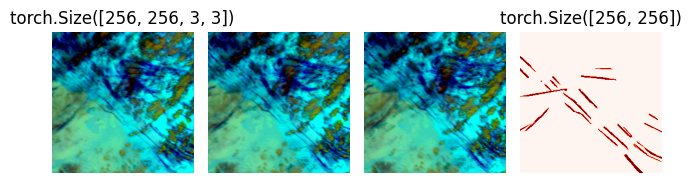

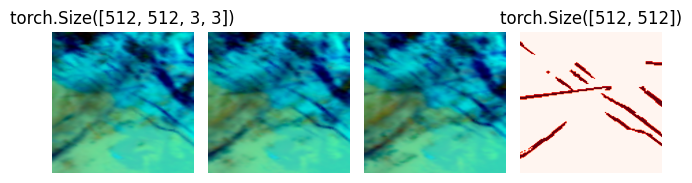

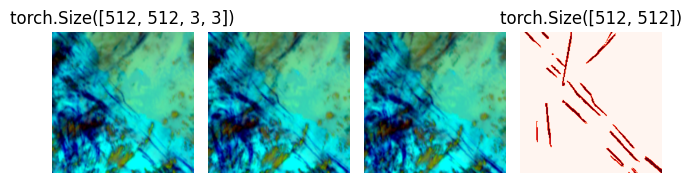

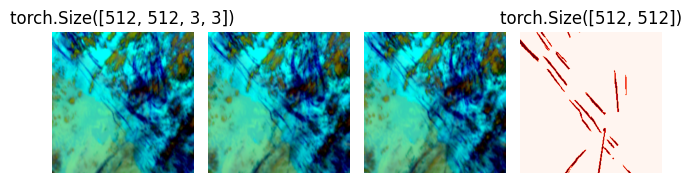

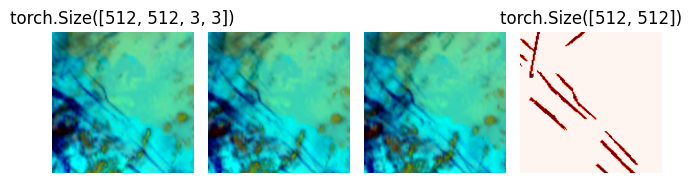

In [3]:
import matplotlib.pyplot as plt

samples = 5
ix = 1
for i in range(samples):
    if i == 0:
        images, masks, masks0 = next(iter(dm1.train_dataloader(shuffle=False)))
    else:
        images, masks, masks0 = next(iter(dm2.train_dataloader(shuffle=False)))

    fig = plt.figure()
    ax = fig.add_subplot(1, 4, 1)
    ax.imshow(images[ix][...,0,:3])
    ax.axis('off')
    ax.set_title(images[ix].shape)
    ax = fig.add_subplot(1, 4, 2)
    ax.imshow(images[ix][...,1,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 4, 3)
    ax.imshow(images[ix][...,2,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 4, 4)
    ax.imshow(masks[ix], cmap='Reds')
    ax.axis('off')
    ax.set_title(masks[ix].shape)
    plt.tight_layout()
    plt.show()

In [31]:
images.shape, masks.shape, masks0.shape

(torch.Size([2, 512, 512, 3, 3]),
 torch.Size([2, 512, 512]),
 torch.Size([2, 256, 256]))

En validación, las transforms no se aplican a la máscara! usar solo resize (no flips)

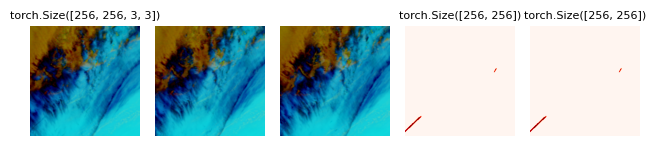

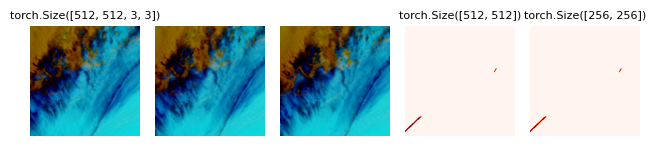

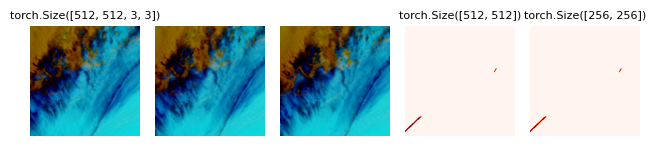

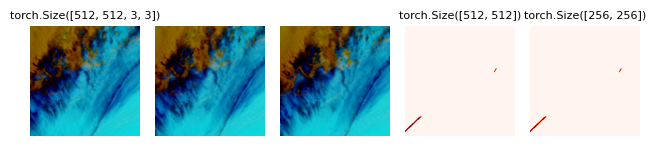

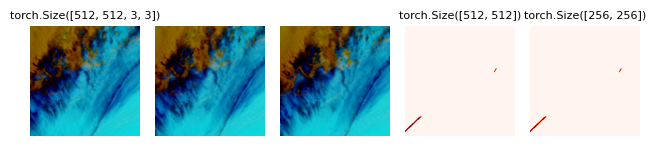

In [4]:
samples = 5
ix = 1
for i in range(samples):
    if i == 0:
        images, masks, masks0 = next(iter(dm1.val_dataloader()))
    else:
        images, masks, masks0 = next(iter(dm2.val_dataloader()))

    fig = plt.figure()
    ax = fig.add_subplot(1, 5, 1)
    ax.imshow(images[ix][...,0,:3])
    ax.axis('off')
    ax.set_title(images[ix].shape, fontsize=8)
    ax = fig.add_subplot(1, 5, 2)
    ax.imshow(images[ix][...,1,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 5, 3)
    ax.imshow(images[ix][...,2,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 5, 4)
    ax.imshow(masks[ix], cmap='Reds')
    ax.axis('off')
    ax.set_title(masks[ix].shape, fontsize=8)
    ax = fig.add_subplot(1, 5, 5)
    ax.imshow(masks0[ix], cmap='Reds')
    ax.axis('off')
    ax.set_title(masks0[ix].shape, fontsize=8)
    plt.tight_layout()
    plt.show()